# Kamp Competition PreProcessed Data EDA

## Library Import

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

from kamp.preprocess import load_preprocessed_unscaled_data

DATA_PATH = './data/경진대회용 주조 공정최적화 데이터셋.csv'

## Data PreProcess

In [3]:
data = load_preprocessed_unscaled_data(DATA_PATH)

[Process Log] Load Raw Data
[Process Log] Done

[Process Log] Process Nan Value
[Process Log] Done

[Process Log] Encoding Categorical Features
[Process Log] Done

[Process Log] Drop Duplicates
[Process Log] Done

[Process Log] Remove Outliers (LOF)
[Process Log] Done

[Process Log] T-Testing
[Process Log] Done



## 기초 통계량

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88569 entries, 0 to 88568
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   count                 88569 non-null  int64  
 1   working               88569 non-null  float64
 2   molten_temp           88569 non-null  float64
 3   production_cycletime  88569 non-null  int64  
 4   low_section_speed     88569 non-null  float64
 5   high_section_speed    88569 non-null  float64
 6   cast_pressure         88569 non-null  float64
 7   biscuit_thickness     88569 non-null  float64
 8   upper_mold_temp1      88569 non-null  float64
 9   upper_mold_temp2      88569 non-null  float64
 10  lower_mold_temp1      88569 non-null  float64
 11  lower_mold_temp2      88569 non-null  float64
 12  lower_mold_temp3      88569 non-null  float64
 13  sleeve_temperature    88569 non-null  float64
 14  physical_strength     88569 non-null  float64
 15  Coolant_temperature

In [5]:
desc = data.describe().T
desc['skew'] = data.skew()

desc

,count,mean,std,min,25%,50%,75%,max,skew
count,88569.0,148.974709,87.764055,1.0,73.0,147.0,223.0,334.0,0.082831
working,88569.0,0.999673,0.018092,0.0,1.0,1.0,1.0,1.0,-55.237733
molten_temp,88569.0,718.771850,50.756682,0.0,713.0,728.0,730.0,735.0,-13.501842
production_cycletime,88569.0,122.274475,12.156536,0.0,119.0,121.0,123.0,462.0,5.566899
low_section_speed,88569.0,108.737030,7.938553,0.0,110.0,110.0,110.0,140.0,-7.452230
high_section_speed,88569.0,111.775881,9.283724,0.0,112.0,112.0,112.0,354.0,10.732861
cast_pressure,88569.0,324.998566,25.667245,139.0,329.0,330.0,331.0,345.0,-6.102264
biscuit_thickness,88569.0,50.501214,15.491489,0.0,47.0,50.0,53.0,422.0,22.001502
upper_mold_temp1,88569.0,186.940464,45.759864,19.0,163.0,195.0,223.0,337.0,-0.530588
upper_mold_temp2,88569.0,166.641048,28.346111,15.0,149.0,173.0,185.0,243.0,-0.562021


## 'count'별 Fail 비율

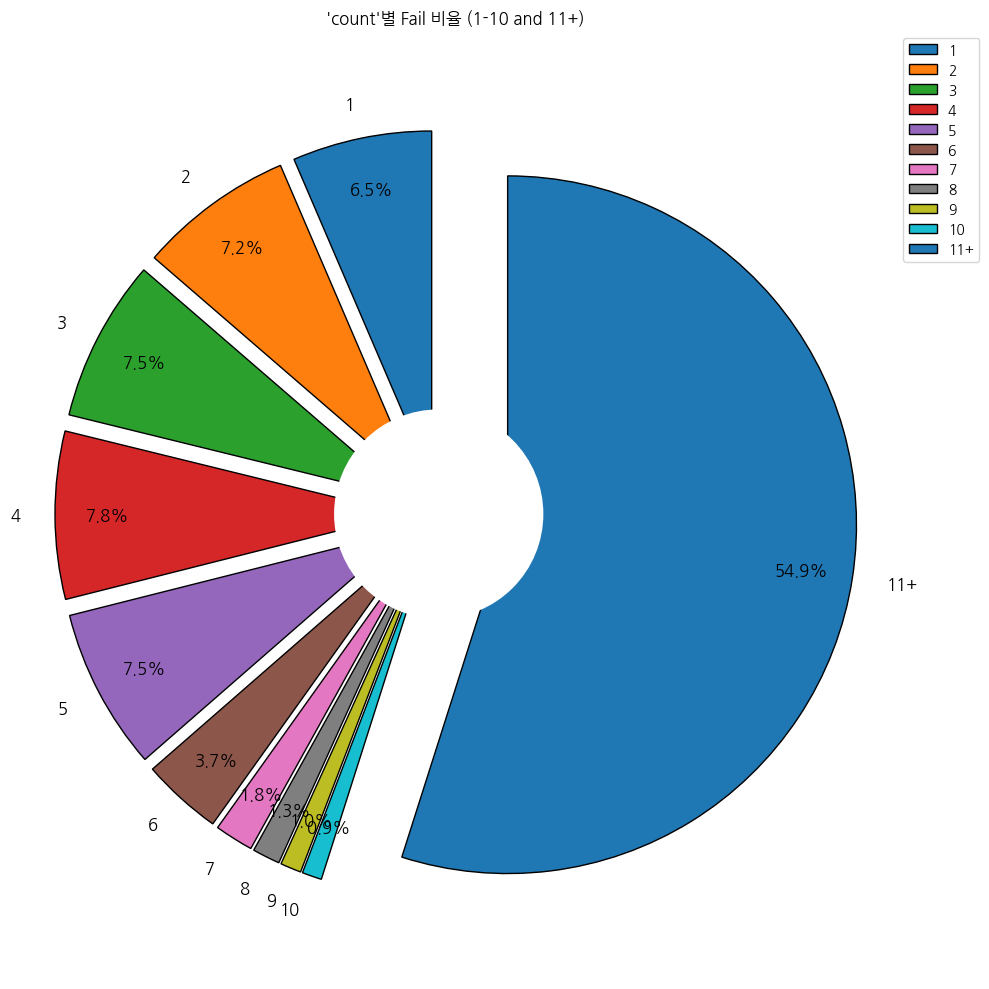

In [20]:
data['count_group'] = data['count'].apply(lambda x: x if x <= 10 else '11+')

grouped = data[data['passorfail'] == 1].groupby('count_group')['passorfail'].sum() / data['passorfail'].sum()

fig, ax = plt.subplots(figsize=(10,10))

explode = [0.1 if label != '11+' else 0.2 for label in grouped.index]

ax.pie(
    grouped,
    labels=grouped.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor' : 'black', 'linewidth' : 1},
    textprops = {'fontsize' : 12, 'color' : 'black'},
    pctdistance=0.85,
    explode=explode
)
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig.gca().add_artist(centre_circle)

plt.title("'count'별 Fail 비율 (1-10 and 11+)")

plt.legend(grouped.index, loc='upper left', bbox_to_anchor=(1, 1))

ax.axis('equal')
plt.tight_layout()
plt.show()